# Clustering Algorithm

The objective of this assessment is to evaluate your understanding and ability to apply clustering techniques to a real-world dataset. Dataset Use the Iris dataset available in the sklearn library.

In [38]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs
import pylab as pl
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

1. Load and Preprocess dataset

In [18]:
from sklearn.datasets import load_iris

In [19]:
iris=load_iris()

In [20]:
x=iris.data

In [21]:
y=iris.target

In [22]:
feature = iris.feature_names

In [23]:
df=pd.DataFrame(x,columns=feature)

In [24]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [26]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [27]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [28]:
df.duplicated().sum()

1

In [29]:
df=df.drop_duplicates()

In [30]:
df.duplicated().sum()

0

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


2.Clustering Algorithm Implementation

A. KMeans Clustering

 KMeans is a centroid-based clustering algorithm that partitions data into k clusters.
It iteratively assigns points to the nearest cluster centroid and updates centroids until convergence.

In [32]:
# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(x_scaled)

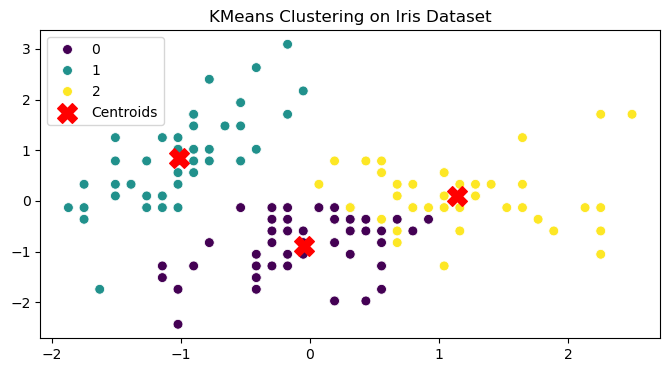

In [33]:
# Visualization of KMeans Clusters

plt.figure(figsize=(8, 4))
sns.scatterplot(x=x_scaled[:, 0], y=x_scaled[:, 1], hue=kmeans_labels, palette='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.title("KMeans Clustering on Iris Dataset")
plt.legend()
plt.show()

B. Hierarchical clustering
 

Hierarchical clustering builds a tree-like structure of clusters, merging them step by step.
We use Agglomerative Clustering, a bottom-up approach where each point starts as its own cluster.

In [36]:
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(x_scaled)

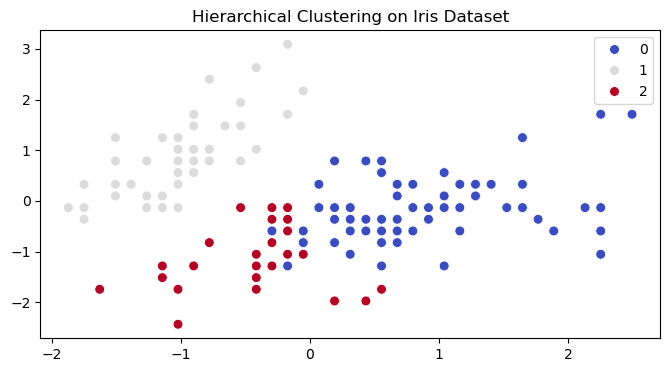

In [37]:
# Visualization of Hierarchical Clustering

plt.figure(figsize=(8, 4))
sns.scatterplot(x=x_scaled[:, 0], y=x_scaled[:, 1], hue=hierarchical_labels, palette='coolwarm', s=50)
plt.title("Hierarchical Clustering on Iris Dataset")
plt.show()

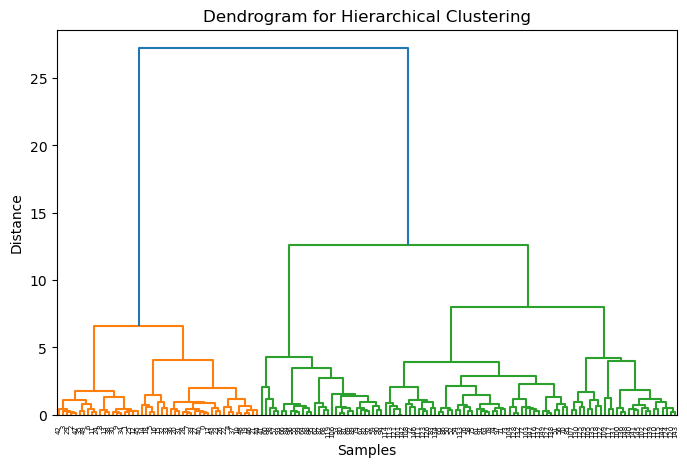

In [41]:
# Dendrogram for Hierarchical Clustering
# The dendrogram shows how clusters are merged step by step, helping to determine the optimal number of clusters.

linked = linkage(x_scaled, method='ward')
plt.figure(figsize=(8, 5))
dendrogram(linked)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()
